In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'peak_fwhm_nlpi'

In [6]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type / 'all_motors_coma_denoised_worse'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [7]:
!ls {data_base_dir}

Screen Shot 2022-11-22 at 12.04.54 AM.png
initial_motor_positions.json
peak_fwhm_nlpi_moo_100_2022-11-22_images
peak_fwhm_nlpi_moo_100_2022-11-22_steps
peak_fwhm_nlpi_moo_autofocusing.ini
peak_fwhm_nlpi_moo_optimization_final_101_2022-11-22_07:07.gz


### peak_fwhm_150_2022-11-21

In [8]:
!ls {data_base_dir}

Screen Shot 2022-11-22 at 12.04.54 AM.png
initial_motor_positions.json
peak_fwhm_nlpi_moo_100_2022-11-22_images
peak_fwhm_nlpi_moo_100_2022-11-22_steps
peak_fwhm_nlpi_moo_autofocusing.ini
peak_fwhm_nlpi_moo_optimization_final_101_2022-11-22_07:07.gz


In [9]:
log_file = Path(data_base_dir / 'peak_fwhm_nlpi_moo_optimization_final_101_2022-11-22_07:07.gz')
log_file.exists()

True

In [10]:
hist_dir = Path(data_base_dir / 'peak_fwhm_nlpi_moo_100_2022-11-22_steps')
hist_dir.exists()

True

In [11]:
study = analysis.create_study_from_trials(log_file, n_objectives=3)

[I 2022-11-23 17:56:50,402] A new study created in memory with name: no-name-a2f0d024-d074-491c-b42a-c20fca1da009


Assuming minimization for all objectives.


In [12]:
n_steps = len(study.trials)

In [13]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

Trial values: peak_distance 2.856e-01 fwhm 4.038e-02 nlpi -8.590e+00
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.356888186524848, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.03828983301834468, 'h_peak': -0.18501065308012973, 'v_sigma': 0.36615750530833296, 'v_fwhm': 0.039015240328255096, 'v_centroid': 0.012123161299825741, 'v_peak': 0.21750996483001167, 'integral_intensity': 20.427011617116996, 'peak_intensity': 5379.748, 'gaussian_fit': {}}}


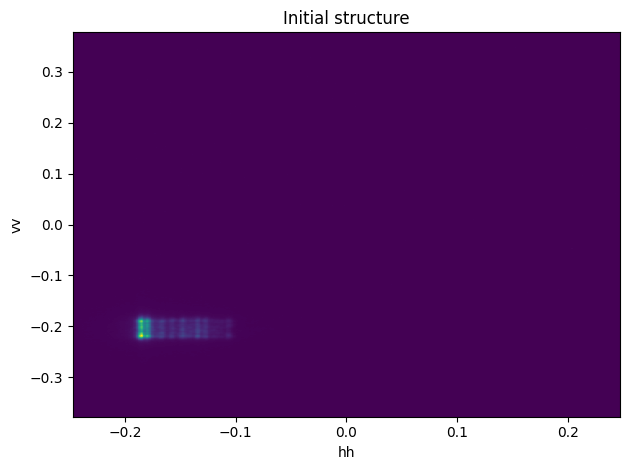

In [14]:
print(f"Trial values: peak_distance {study.trials[0].values[0]:4.3e} fwhm {study.trials[0].values[1]:4.3e} " +
     f"nlpi {study.trials[0].values[2]:4.3e}")
print("Trial dw:")
print(study.trials[0].user_attrs["dw"].__dict__)


plt.pcolormesh(hists[0].hh[700:-700], hists[0].vv[700:-700], hists[0].data_2D[700:-700,700:-700].T)
plt.xlabel('hh')
plt.ylabel('vv')
plt.title("Initial structure")
plt.tight_layout()
plt.show()

In [15]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [16]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[83, 75, 81, 77, 52, 52, 70, 53, 76]
27 [0.022959328856514947, 0.008748622723388416, -10.173650741577148]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.35393269909478287, 'h_fwhm': 0.006503010653080565, 'h_centroid': -0.00749062005462614, 'h_peak': -0.0224353867531264, 'v_sigma': 0.3556883974896346, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.05261119726627651, 'v_peak': -0.004876905041031705, 'integral_intensity': 20.921356274366325, 'peak_intensity': 26203.57, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.008748622723388416


Trial number 27
Trial values: peak_distance 2.296e-02 fwhm 8.749e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.35393269909478287, 'h_fwhm': 0.006503010653080565, 'h_centroid': -0.00749062005462614, 'h_peak': -0.0224353867531264, 'v_sigma': 0.3556883974896346, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.05261119726627651, 'v_peak': -0.004876905041031705, 'integral_intensity': 20.921356274366325, 'peak_intensity': 26203.57, 'gaussian_fit': {}}}
Actual fwhm 0.008748622723388416


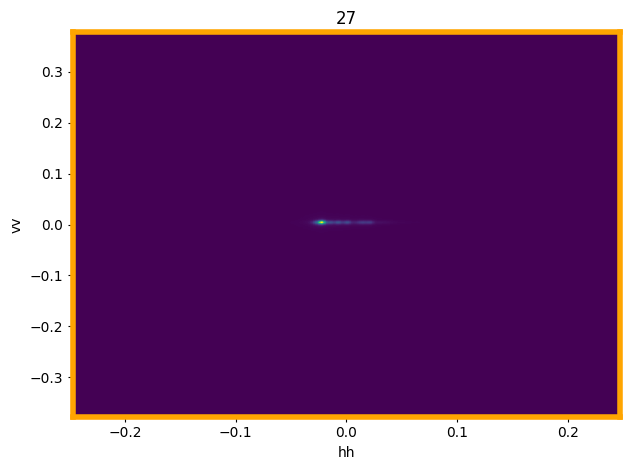

Trial number 29
Trial values: peak_distance 4.692e-02 fwhm 1.107e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3504298982173905, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.0022553178349562775, 'h_peak': 0.032189902732746634, 'v_sigma': 0.3495138255445089, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.05865801072668969, 'v_peak': -0.03413833528722164, 'integral_intensity': 20.160534843941942, 'peak_intensity': 37522.633, 'gaussian_fit': {}}}
Actual fwhm 0.011073893725051806


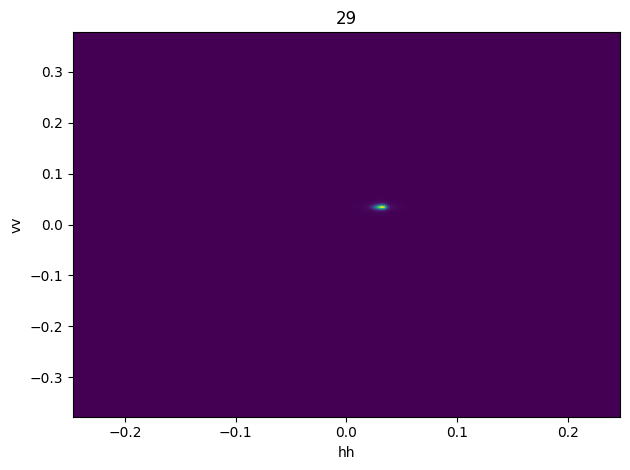

Trial number 38
Trial values: peak_distance 7.542e-03 fwhm 1.016e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3552944560490948, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0053073349155349225, 'h_peak': 0.007478462251042083, 'v_sigma': 0.3545727990166759, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.05268993572916483, 'v_peak': -0.000975381008206341, 'integral_intensity': 20.70457411092495, 'peak_intensity': 25405.703, 'gaussian_fit': {}}}
Actual fwhm 0.01015772610582563


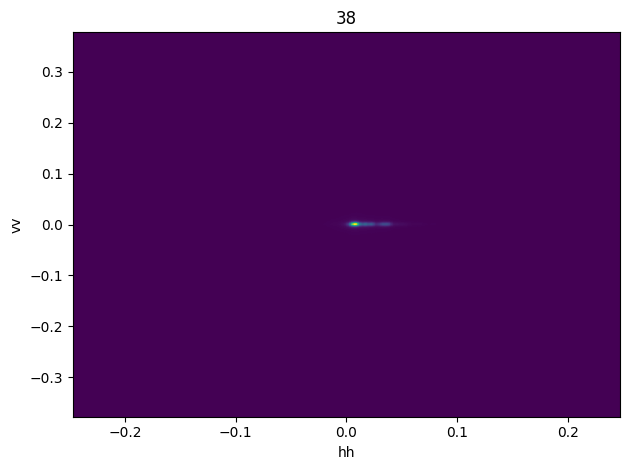

Trial number 63
Trial values: peak_distance 2.190e-02 fwhm 9.667e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3602409148993273, 'h_fwhm': 0.006503010653080565, 'h_centroid': 0.0007986486693559169, 'h_peak': 0.02178508568781848, 'v_sigma': 0.3642744052067354, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.05116267577414832, 'v_peak': -0.0022758890191481784, 'integral_intensity': 22.51174278153218, 'peak_intensity': 24397.145, 'gaussian_fit': {}}}
Actual fwhm 0.009667037313542709


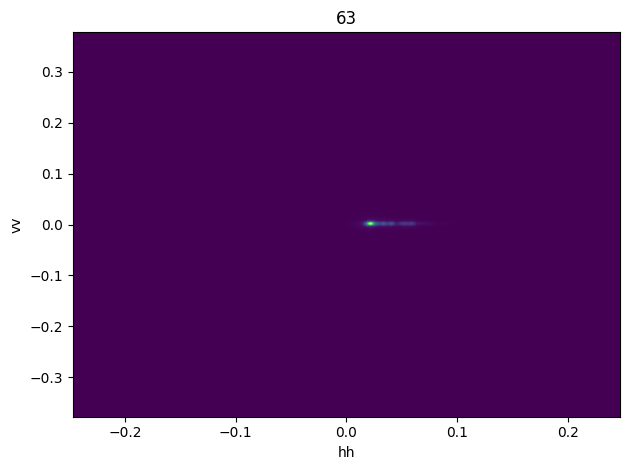

Trial number 65
Trial values: peak_distance 7.692e-02 fwhm 1.396e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.35231865461430634, 'h_fwhm': 0.012355720240853074, 'h_centroid': -0.019347357505594687, 'h_peak': -0.06405465493283932, 'v_sigma': 0.3539268974476916, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.043876713294928135, 'v_peak': 0.042591637358343065, 'integral_intensity': 20.331492420354557, 'peak_intensity': 38044.164, 'gaussian_fit': {}}}
Actual fwhm 0.013962336832827221


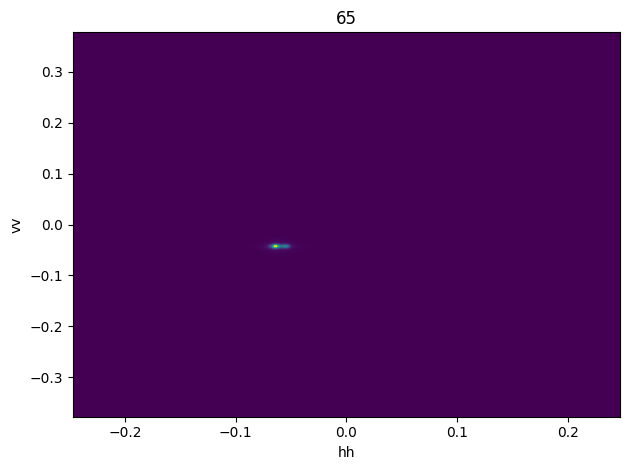

Trial number 66
Trial values: peak_distance 9.886e-02 fwhm 1.067e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3580160825209283, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.019213078133758887, 'h_peak': -0.0692570634553034, 'v_sigma': 0.3598537583583011, 'v_fwhm': 0.006502540054709183, 'v_centroid': 0.06287789657508622, 'v_peak': -0.07055255959359132, 'integral_intensity': 21.922516601716115, 'peak_intensity': 37050.02, 'gaussian_fit': {}}}
Actual fwhm 0.010665443569279778


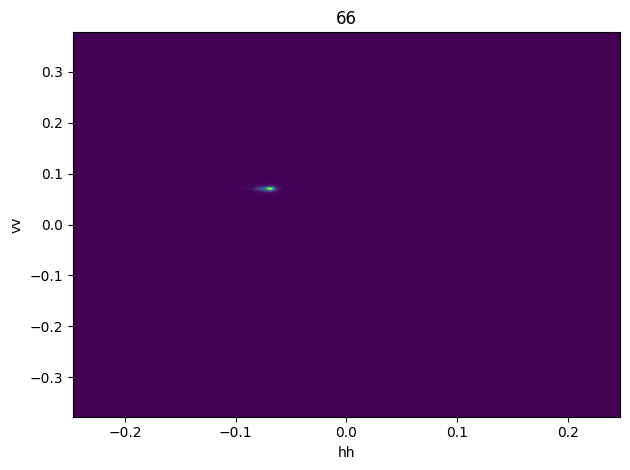

Trial number 83
Trial values: peak_distance 2.860e-02 fwhm 1.249e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3599139806299514, 'h_fwhm': 0.009754515979620848, 'h_centroid': -0.006702671824567019, 'h_peak': 0.0042269569245020535, 'v_sigma': 0.3607667397841243, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.05785633785911655, 'v_peak': -0.028286049237983595, 'integral_intensity': 20.587079680341546, 'peak_intensity': 26839.777, 'gaussian_fit': {}}}
Actual fwhm 0.012491522769924353


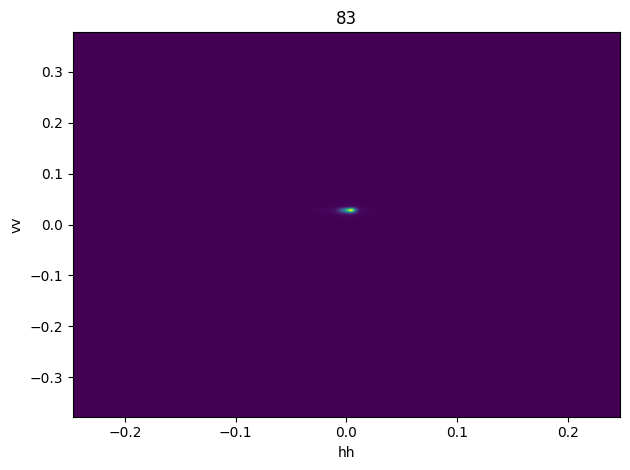

Trial number 97
Trial values: peak_distance 9.302e-02 fwhm 1.105e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.357200720205372, 'h_fwhm': 0.009754515979620848, 'h_centroid': 0.005896181569210263, 'h_peak': 0.0692570634553034, 'v_sigma': 0.36032982331902624, 'v_fwhm': 0.005202032043767346, 'v_centroid': 0.04076063629078713, 'v_peak': 0.06209925752246959, 'integral_intensity': 21.007548851725375, 'peak_intensity': 36517.9, 'gaussian_fit': {}}}
Actual fwhm 0.011054940948782167


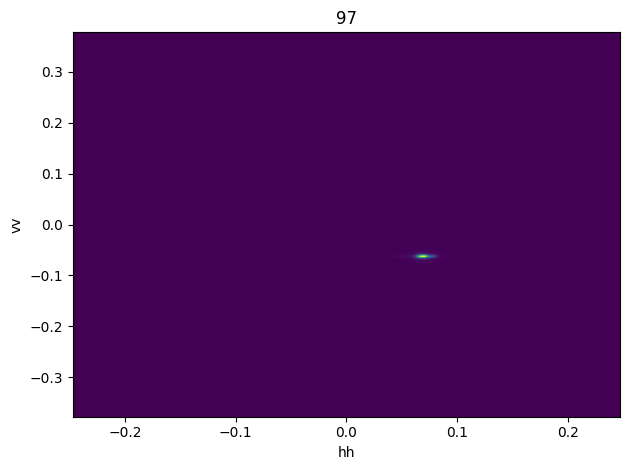

Trial number 101
Trial values: peak_distance 2.055e-02 fwhm 9.667e-03
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.34918601645840414, 'h_fwhm': 0.006503010653080565, 'h_centroid': -0.009403577216778869, 'h_peak': -0.020484483557202348, 'v_sigma': 0.34200575762912017, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.05397750742991089, 'v_peak': -0.0016256350136773334, 'integral_intensity': 18.26303125086886, 'peak_intensity': 23177.584, 'gaussian_fit': {}}}
Actual fwhm 0.009667037313542709


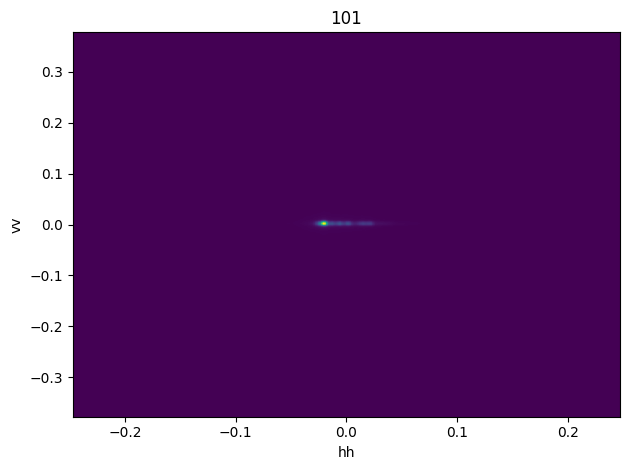

CA client library is unable to contact CA repeater after 50 tries.
Silence this message by starting a CA repeater daemon
or by calling ca_pend_event() and or ca_poll() more often.


In [17]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [18]:
study.best_trials[0].values

[0.022959328856514947, 0.008748622723388416, -10.173650741577148]

In [19]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['peak_distance', 'fwhm', 'nlpi'])

In [20]:
pareto_df

,number,peak_distance,fwhm,nlpi,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
27,27,0.022959,0.008749,-10.173651,-0.022435,-0.004877,0.006503,0.005852,26203.570312
29,29,0.046921,0.011074,-10.532700,0.032190,-0.034138,0.008454,0.007153,37522.632812
38,38,0.007542,0.010158,-10.142729,0.007478,-0.000975,0.007804,0.006503,25405.703125
63,63,0.021904,0.009667,-10.102221,0.021785,-0.002276,0.006503,0.007153,24397.144531
65,65,0.076922,0.013962,-10.546503,-0.064055,0.042592,0.012356,0.006503,38044.164062
66,66,0.098865,0.010665,-10.520024,-0.069257,-0.070553,0.008454,0.006503,37050.019531
83,83,0.028600,0.012492,-10.197640,0.004227,-0.028286,0.009755,0.007803,26839.777344
97,97,0.093021,0.011055,-10.505558,0.069257,0.062099,0.009755,0.005202,36517.898438
101,101,0.020549,0.009667,-10.050941,-0.020484,-0.001626,0.006503,0.007153,23177.583984


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/2375896861.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)


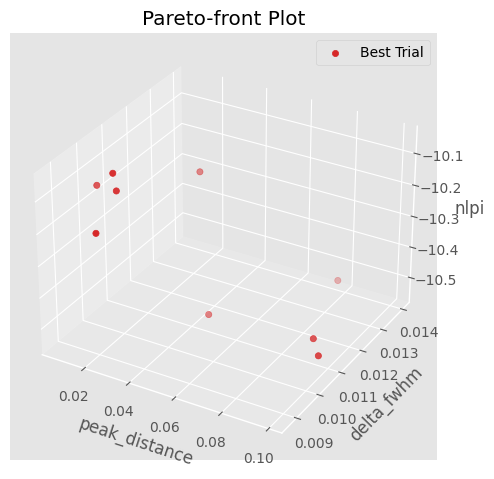

In [21]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "delta_fwhm", "nlpi"], include_dominated_trials=False)
#plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/320309324.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


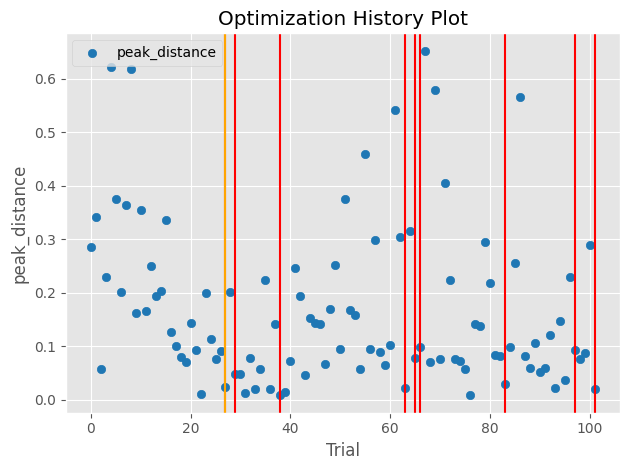

In [22]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/1279663034.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")


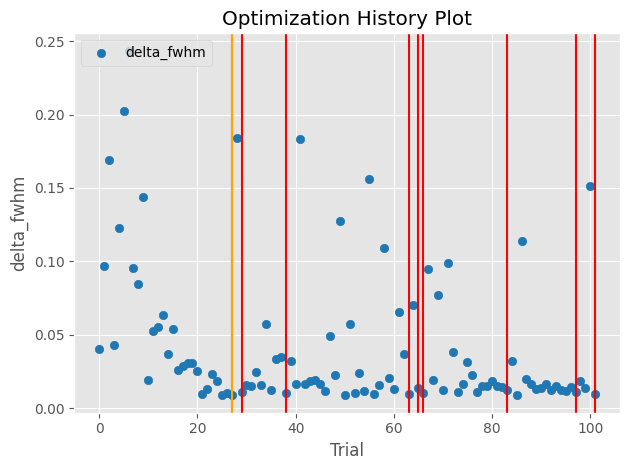

In [23]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="delta_fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/3199083138.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")


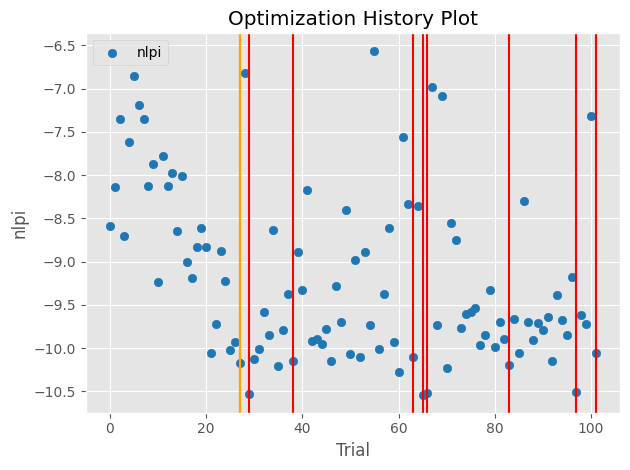

In [24]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[2], target_name="nlpi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### The remaining part is just testing how lwsi with thresholding performs in selecting the structures. This is for my own satisfaction. - SK

In [25]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


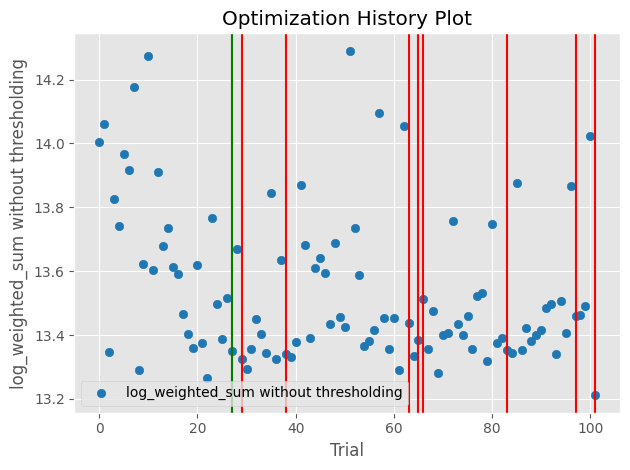

In [26]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/2958963105.py:2: RuntimeWarning: divide by zero encountered in log
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


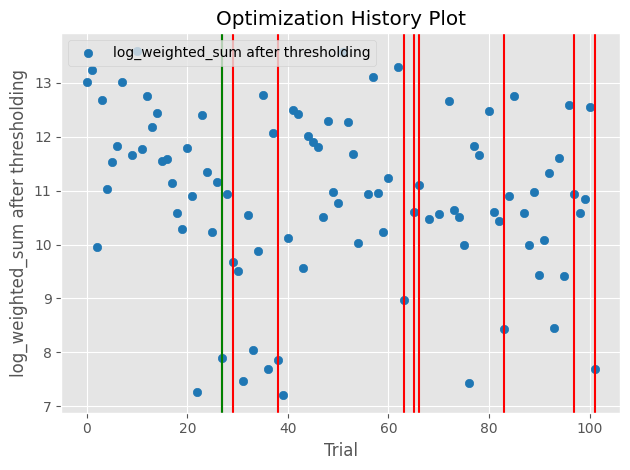

In [27]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [28]:
test_val_fns = [lambda t: t.values[0], lambda t: t.values[2], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins))

29


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/3646926250.py:1: RuntimeWarning: divide by zero encountered in log
  test_val_fns = [lambda t: t.values[0], lambda t: t.values[2], lambda t: np.log(wsums_thres[t.number])]


22 [0.011045184311564527, -9.717620849609375, 7.262693090172625]


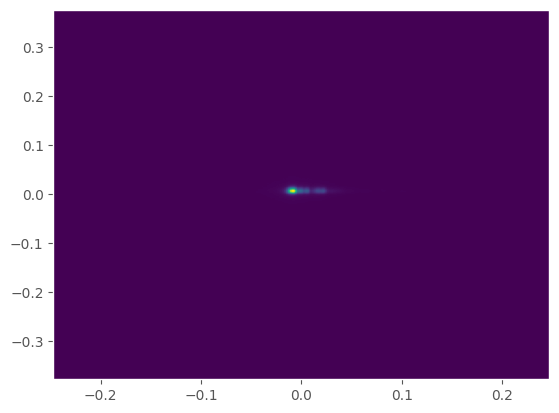

27 [0.022959328856514947, -10.173650741577148, 7.891995894616034]


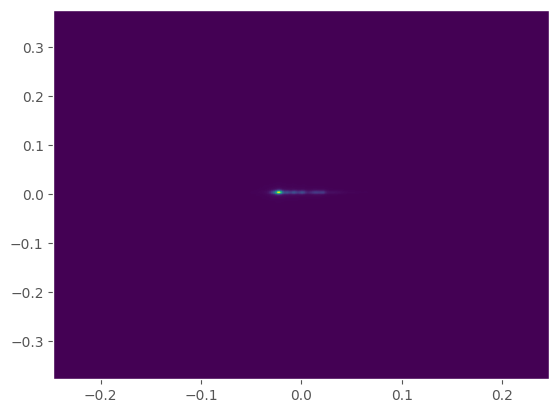

29 [0.04692137864690733, -10.532699584960938, 9.671769987655708]


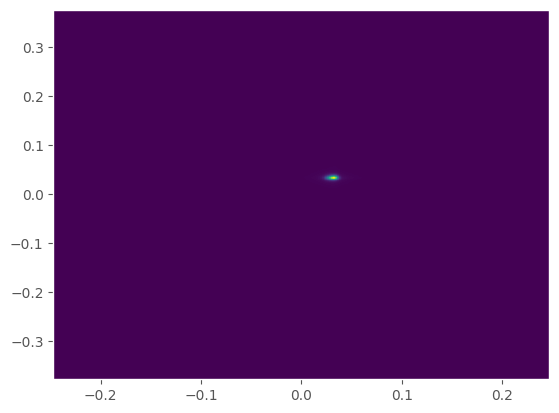

31 [0.012718327393393208, -10.013815879821777, 7.476212680994862]


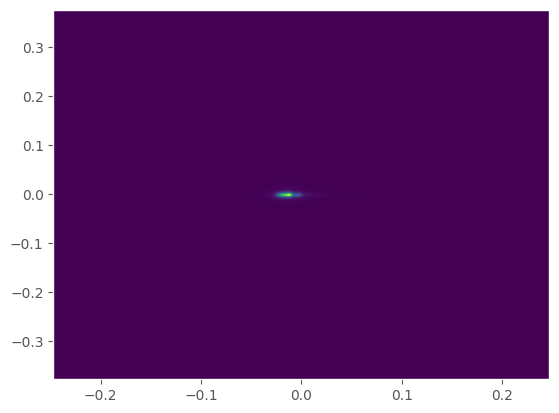

38 [0.007541801227255398, -10.142728805541992, 7.860110266303416]


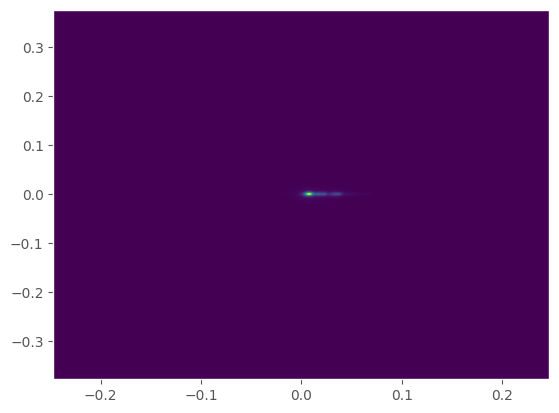

39 [0.014431638863467358, -8.885009765625, 7.200962826350302]


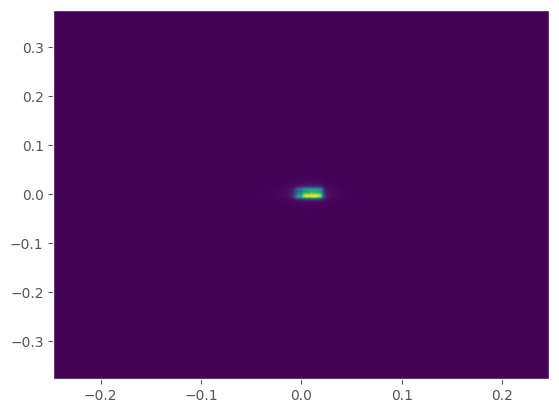

65 [0.07692234000230182, -10.546503067016602, 10.596598873437028]


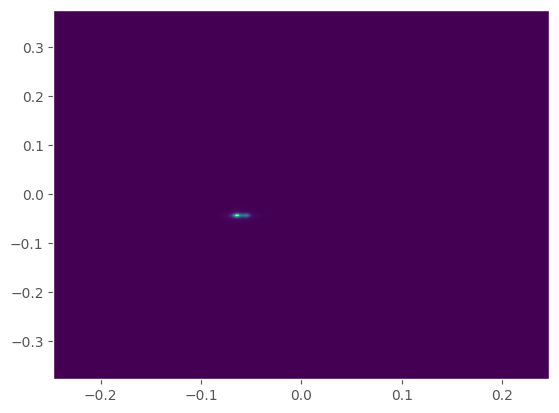

76 [0.007541801227255398, -9.534491539001465, 7.432881542012979]


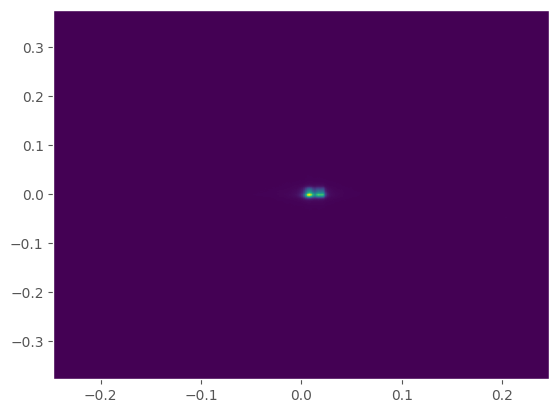

79 [0.2937139418121372, -9.327126502990723, -inf]


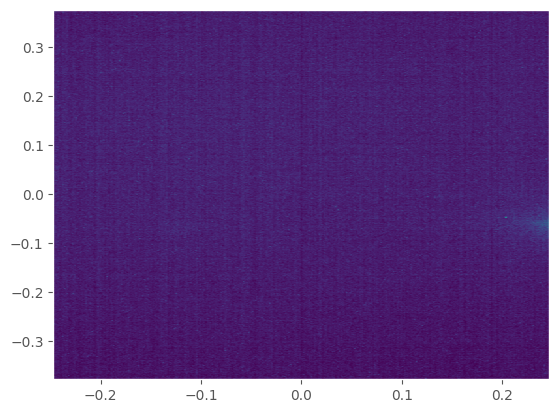

83 [0.028600135425120424, -10.197640419006348, 8.442320204703128]


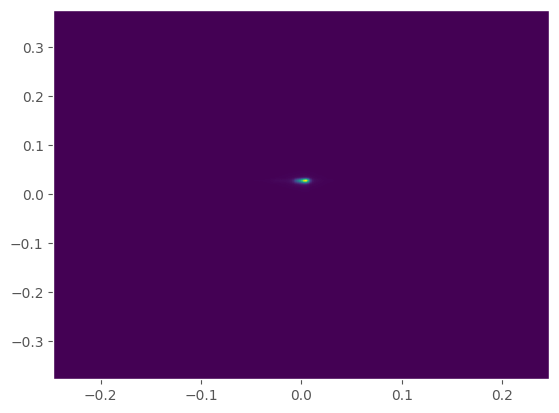

101 [0.020548886972363907, -10.05094051361084, 7.700295251518294]


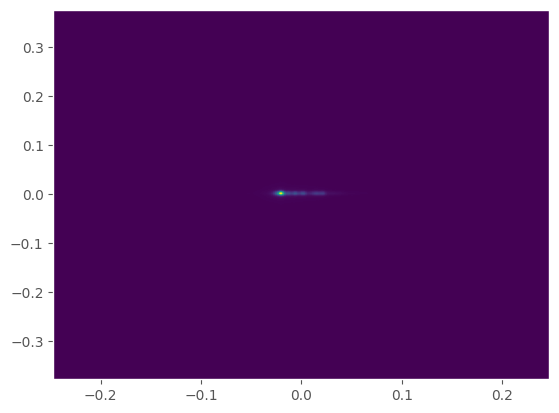

In [29]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [30]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_13478/2248954796.py:1: RuntimeWarning: divide by zero encountered in log
  test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]


27 82
